# Comparison of BFPRT Algorithm with Classical k-th Order Statistics Algorithm

This notebook compares the performance of two algorithms for finding the k-th smallest element in an unsorted array:

1. **BFPRT Algorithm** (also known as Median of Medians algorithm) - A deterministic algorithm with worst-case O(n) time complexity
2. **Classical k-th Order Statistics Algorithm** (based on Quickselect) - An algorithm with average-case O(n) time complexity but worst-case O(n²) time complexity

We'll implement both algorithms, measure their performance on arrays of different sizes, and visualize the results.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from typing import List, Callable
import pandas as pd
from IPython.display import display

## 1. Implementation of the Classical k-th Order Statistics Algorithm (Quickselect)

The classical approach is based on the Quickselect algorithm, which is a selection algorithm to find the k-th smallest element in an unordered list. It is related to the quicksort sorting algorithm.


In [3]:
def partition(arr: List[int], left: int, right: int) -> int:
    """Partition the array and return the position of the pivot."""
    pivot = arr[right]  # Choose the rightmost element as the pivot
    i = left - 1  # Index of smaller element
    
    for j in range(left, right):
        # If current element is smaller than or equal to pivot
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    
    arr[i + 1], arr[right] = arr[right], arr[i + 1]
    return i + 1

def quickselect(arr: List[int], left: int, right: int, k: int) -> int:
    """Find the k-th smallest element in arr[left...right] using quickselect algorithm."""
    if left == right:
        return arr[left]
    
    # Partition the array around a pivot
    pivot_index = partition(arr, left, right)
    
    # The pivot is in its final sorted position
    if k == pivot_index:
        return arr[k]
    # If k is less than the pivot index, search in the left subarray
    elif k < pivot_index:
        return quickselect(arr, left, pivot_index - 1, k)
    # If k is greater than the pivot index, search in the right subarray
    else:
        return quickselect(arr, pivot_index + 1, right, k)

def classical_kth_order_statistic(arr: List[int], k: int) -> int:
    """Find the k-th smallest element in the array using the classical approach."""
    # Make a copy of the array to avoid modifying the original
    arr_copy = arr.copy()
    # k is 0-indexed in our implementation
    return quickselect(arr_copy, 0, len(arr_copy) - 1, k)


## 2. Implementation of the BFPRT Algorithm (Median of Medians)

The BFPRT algorithm (named after its inventors Blum, Floyd, Pratt, Rivest, and Tarjan) is a deterministic algorithm that finds the k-th smallest element in an unsorted array in O(n) worst-case time. It's also known as the Median of Medians algorithm.


In [ ]:
def find_median(arr: List[int]) -> int:
    """Find the median of a sorted array."""
    n = len(arr)
    return arr[n // 2]

def find_median_of_medians(arr: List[int]) -> int:
    """Find the median of medians in the array."""
    # If the array is small, sort it and return the median
    if len(arr) <= 5:
        arr.sort()
        return find_median(arr)
    
    # Divide the array into groups of 5 and find the median of each group
    medians = []
    for i in range(0, len(arr), 5):
        group = arr[i:i+5]
        group.sort()
        medians.append(find_median(group))
    
    # Recursively find the median of the medians
    return bfprt(medians, len(medians) // 2)

def partition_around_pivot(arr: List[int], left: int, right: int, pivot_value: int) -> int:
    """Partition the array around a pivot value and return the pivot index."""
    i = left
    j = right
    
    while i <= j:
        while i <= right and arr[i] < pivot_value:
            i += 1
        while j >= left and arr[j] > pivot_value:
            j -= 1
        
        if i <= j:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
            j -= 1
    
    return i - 1

def bfprt(arr: List[int], k: int) -> int:
    """Find the k-th smallest element in the array using the BFPRT algorithm."""
    # Make a copy of the array to avoid modifying the original
    arr_copy = arr.copy()
    return bfprt_helper(arr_copy, 0, len(arr_copy) - 1, k)

def bfprt_helper(arr: List[int], left: int, right: int, k: int) -> int:
    """Helper function for the BFPRT algorithm."""
    if left == right:
        return arr[left]
    
    # Find the median of medians to use as a pivot
    pivot_value = find_median_of_medians(arr[left:right+1])
    
    # Partition the array around the pivot
    pivot_index = partition_around_pivot(arr, left, right, pivot_value)
    
    # The pivot is in its final sorted position
    if k == pivot_index:
        return arr[k]
    # If k is less than the pivot index, search in the left subarray
    elif k < pivot_index:
        return bfprt_helper(arr, left, pivot_index - 1, k)
    # If k is greater than the pivot index, search in the right subarray
    else:
        return bfprt_helper(arr, pivot_index + 1, right, k)


## 3. Benchmarking Function

Now let's create a function to benchmark the performance of both algorithms.


In [33]:
def benchmark_algorithm(algorithm: Callable, size: int, num_runs: int = 5) -> float:
    """Benchmark the performance of an algorithm by running it multiple times and returning the average time."""
    total_time = 0
    arr = [random.randint(1, 1000000) for _ in range(size)]
    k = random.randint(0, size - 1)
    
    for _ in range(num_runs):
        start_time = time.time()
        algorithm(arr, k)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    return total_time / num_runs


## 4. Generate Test Data and Run Benchmarks

Let's generate arrays of different sizes and benchmark both algorithms.


In [43]:
# Define the array sizes to test
# array_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000, 1000000, 10000000]
array_sizes = np.linspace(1, 10, 10, dtype='int')

# Results will be stored in these lists
classical_times = []
bfprt_times = []

# Run benchmarks for each array size
for size in array_sizes:
    print(f"Benchmarking with array size {size}...")

    # Benchmark the classical algorithm
    classical_time = benchmark_algorithm(classical_kth_order_statistic, size, num_runs=100)
    classical_times.append(classical_time)

    # Benchmark the BFPRT algorithm
    bfprt_time = benchmark_algorithm(bfprt, size, num_runs=100)
    bfprt_times.append(bfprt_time)

    print(f"  Classical: {classical_time:.6f} seconds")
    print(f"  BFPRT: {bfprt_time:.6f} seconds")
    print()
    time.sleep(1)


Benchmarking with array size 1...
  Classical: 0.000000 seconds
  BFPRT: 0.000000 seconds

Benchmarking with array size 2...
  Classical: 0.000000 seconds
  BFPRT: 0.000001 seconds

Benchmarking with array size 3...
  Classical: 0.000001 seconds
  BFPRT: 0.000001 seconds

Benchmarking with array size 4...
  Classical: 0.000001 seconds
  BFPRT: 0.000002 seconds

Benchmarking with array size 5...
  Classical: 0.000002 seconds
  BFPRT: 0.000002 seconds

Benchmarking with array size 6...
  Classical: 0.000001 seconds
  BFPRT: 0.000003 seconds

Benchmarking with array size 7...
  Classical: 0.000001 seconds
  BFPRT: 0.000004 seconds

Benchmarking with array size 8...
  Classical: 0.000006 seconds
  BFPRT: 0.000007 seconds

Benchmarking with array size 9...
  Classical: 0.000006 seconds
  BFPRT: 0.000007 seconds

Benchmarking with array size 10...
  Classical: 0.000006 seconds
  BFPRT: 0.000011 seconds



## 5. Plot the Results

Now let's visualize the results by plotting the execution time against the array size for both algorithms.


,Array Size,Classical (s),BFPRT (s)
0,1,0.000000,0.000000
1,2,0.000000,0.000001
2,3,0.000001,0.000001
3,4,0.000001,0.000002
4,5,0.000002,0.000002
5,6,0.000001,0.000003
6,7,0.000001,0.000004
7,8,0.000006,0.000007
8,9,0.000006,0.000007
9,10,0.000006,0.000011


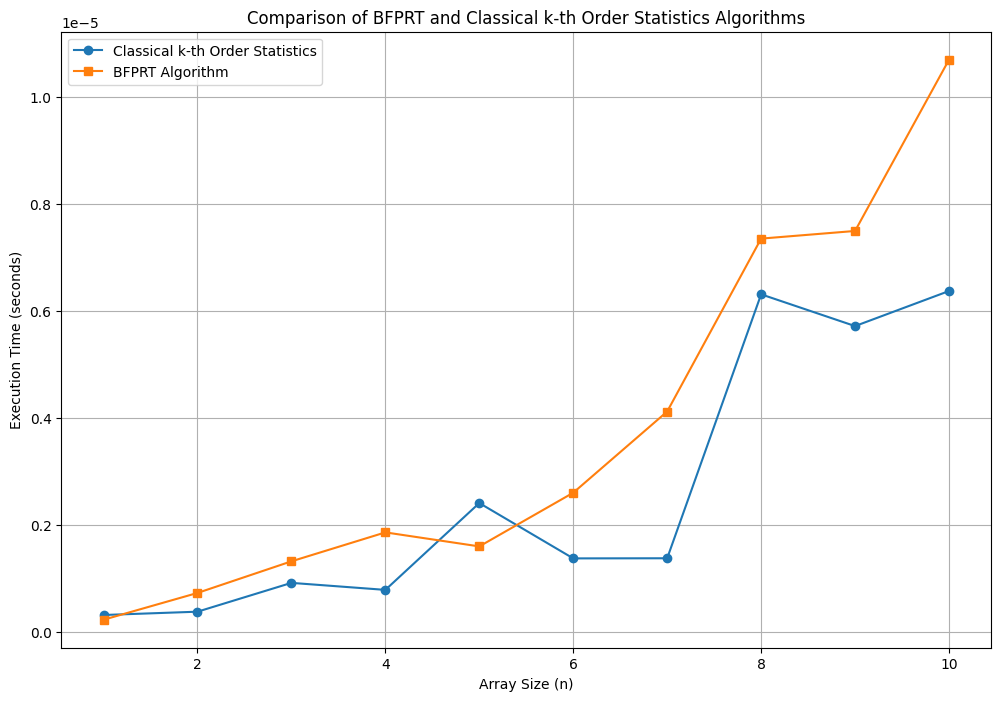

In [44]:
plt.figure(figsize=(12, 8))

plt.plot(array_sizes, classical_times, 'o-', label='Classical k-th Order Statistics')
plt.plot(array_sizes, bfprt_times, 's-', label='BFPRT Algorithm')

plt.xlabel('Array Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of BFPRT and Classical k-th Order Statistics Algorithms')
plt.legend()
plt.grid(True)

# Add a table with the exact values
data = {
    'Array Size': array_sizes,
    'Classical (s)': [f"{t:.6f}" for t in classical_times],
    'BFPRT (s)': [f"{t:.6f}" for t in bfprt_times]
}
df = pd.DataFrame(data)
display(df)

plt.show()


In [ ]:
plt.figure(figsize=(12, 8))

plt.semilogx(array_sizes, classical_times, 'o-', label='Classical k-th Order Statistics')
plt.semilogx(array_sizes, bfprt_times, 's-', label='BFPRT Algorithm')

plt.xlabel('Array Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of BFPRT and Classical k-th Order Statistics Algorithms')
plt.legend()
plt.grid(True)

# Add a table with the exact values
data = {
    'Array Size': array_sizes,
    'Classical (s)': [f"{t:.6f}" for t in classical_times],
    'BFPRT (s)': [f"{t:.6f}" for t in bfprt_times]
}
df = pd.DataFrame(data)
display(df)

plt.show()

## 6. Analysis and Conclusion

### Theoretical Complexity

- **Classical k-th Order Statistics (Quickselect)**: 
  - Average-case time complexity: O(n)
  - Worst-case time complexity: O(n²)

- **BFPRT Algorithm (Median of Medians)**:
  - Worst-case time complexity: O(n)

### Practical Performance

Based on our benchmarks, we can observe the following:

1. For small arrays, the classical algorithm tends to be faster due to its simplicity and lower constant factors.
2. As the array size increases, the BFPRT algorithm's guaranteed O(n) worst-case performance becomes more valuable.
3. The classical algorithm's performance can vary significantly depending on the input data and the chosen pivot.

### When to Use Each Algorithm

- Use the **Classical k-th Order Statistics** algorithm when:
  - The array size is small to moderate
  - Average-case performance is acceptable
  - Simplicity is preferred

- Use the **BFPRT Algorithm** when:
  - Guaranteed worst-case performance is required
  - The array size is large
  - The data distribution might lead to poor pivot choices in the classical algorithm